<a href="https://colab.research.google.com/github/choijaehyeokk/nlpforsh/blob/master/NLPTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 준비

In [0]:
!pip install --upgrade pip
!pip install konlpy

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.1.1)


In [0]:
#-*- coding: utf-8 -*-
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
train_data = pd.read_csv("ChatbotData_.csv", encoding='utf-8')
test_data = pd.read_csv("ChatbotData_test.csv", encoding='utf-8')

In [0]:
print('훈련용 문장 개수 :',len(train_data)) # 훈련용 리뷰 개수 출력

훈련용 문장 개수 : 12653


In [0]:
train_data[:5] # 상위 5개 출력

,sentences,label
0,어머,0
1,친구 같은 너,0
2,동성 친구들이 편해,0
3,물 좋은데 어디야?,0
4,몸이 천근만근이다,0


In [0]:
print('테스트용 리뷰 개수 :',len(test_data)) # 테스트용 리뷰 개수 출력
test_data[:5]

테스트용 리뷰 개수 : 3301


,sentences,label
0,어머,0
1,친구 같은 너,0
2,동성 친구들이 편해,0
3,물 좋은데 어디야?,0
4,몸이 천근만근이다,0


# 데이터 정제

In [0]:
train_data['sentences'].nunique(), train_data['label'].nunique()

(12434, 3)

In [0]:
train_data.drop_duplicates(subset=['sentences'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거

In [0]:
print('총 샘플의 수 :',len(train_data))

총 샘플의 수 : 12434


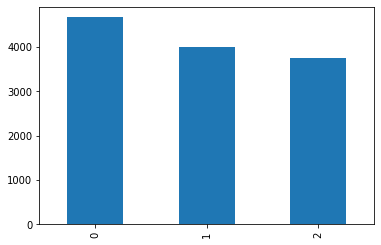

In [0]:
train_data['label'].value_counts().plot(kind = 'bar')

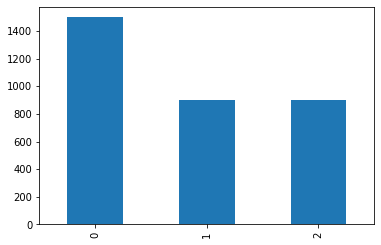

In [0]:
test_data['label'].value_counts().plot(kind = 'bar')

In [0]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0   4672
1      1   4004
2      2   3758


In [0]:
print(train_data.isnull().values.any())

False


In [0]:
train_data['sentences'] = train_data['sentences'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
train_data[:5]

,sentences,label
0,어머,0
1,친구 같은 너,0
2,동성 친구들이 편해,0
3,물 좋은데 어디야,0
4,몸이 천근만근이다,0


In [0]:
test_data.drop_duplicates(subset = ['sentences'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['sentences'] = test_data['sentences'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['sentences'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 3291


# 데이터 전처리


## 토큰화

In [0]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '완전', '진짜']

In [0]:
okt = Okt()

X_train = []
for sentence in train_data['sentences']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [0]:
print(X_train[:])

[['어머'], ['친구', '같다', '너'], ['동성', '친구', '편하다'], ['물', '좋다', '어디', '야'], ['몸', '천', '근', '만', '근', '다'], ['빠떼리', '나가다'], ['회사', '가다', '길', '매일', '보다', '사람', '있다'], ['나', '열심히'], ['일', '어나', '보', '니까', '침대', '에서', '떨어지다', '있다'], ['스터디', '카페', '오다'], ['나', '만', '솔로', '야'], ['아무', '것', '싫다'], ['점심', '메뉴', '고르다'], ['새', '이불', '덮다'], ['시험', '인데', '집중', '안', '돼다'], ['나', '화장', '을', '너무', '못'], ['개강', '옷', '예쁘다', '입다', '보다'], ['내', '좋아하다', '사람과', '나르다', '좋아하다', '사람'], ['주식', '망하다'], ['잔', '싶다'], ['라면', '먹다', '갈래'], ['내', '실력', '쩌', '듯'], ['이어폰', '사다'], ['치매', '면', '어쩌지'], ['말', '있다', '뭘', '끄다'], ['남편', '미우다'], ['짜장면', '시키다'], ['인테리어', '혼자', '해보다'], ['기념일', '또', '까먹다'], ['군대', '기다리다', '주', '려고'], ['먼지', '때문', '목', '아프다'], ['일해', '야', '되다', '졸리다'], ['카톡', '뭐라다', '보내다'], ['추석', '집', '가기', '싫다'], ['씻다', '자다', '되다'], ['집착', '인', '것', '같다', '해'], ['낭만', '사라지다', '것', '같다'], ['수족', '냉증', '이야'], ['아빠', '술', '너무', '많이', '먹다'], ['친하다', '친구', '랑', '싸움'], ['맞팔', '왜', '안', 'ㅠㅠ'], ['분식', '먹다', '싶다'], ['공부',

In [0]:
X_test = []
for sentence in test_data['sentences']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [0]:
print(X_test[:3])

[['어머'], ['친구', '같다', '너'], ['동성', '친구', '편하다']]


## 정수 인코딩

In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [0]:
print(tokenizer.word_index)

{'싶다': 1, '좋아하다': 2, '을': 3, '있다': 4, '사람': 5, '너무': 6, '같다': 7, '나': 8, '좋다': 9, '안': 10, '사랑': 11, '보다': 12, '내': 13, '되다': 14, '없다': 15, '이별': 16, '헤어지다': 17, '거': 18, '썸': 19, '돼다': 20, '한테': 21, '어떻다': 22, '연락': 23, '오다': 24, '그': 25, '것': 26, '가다': 27, '오늘': 28, '만': 29, '못': 30, '그녀': 31, '말': 32, '먹다': 33, '친구': 34, '남자': 35, '자다': 36, '여자친구': 37, '만나다': 38, '뭐': 39, '에서': 40, '남자친구': 41, '마음': 42, '왜': 43, '하고': 44, '생각': 45, '짝남': 46, '다': 47, '썸남': 48, '연애': 49, '년': 50, '랑': 51, '받다': 52, '고': 53, '썸녀': 54, '여자': 55, '않다': 56, '이다': 57, '인데': 58, '게': 59, '힘들다': 60, '수': 61, '모르다': 62, '이제': 63, '해주다': 64, '시간': 65, '타다': 66, '애': 67, '힘드다': 68, '알다': 69, '해': 70, '자꾸': 71, '일': 72, '에게': 73, '또': 74, '짝녀': 75, '많다': 76, '아니다': 77, '이랑': 78, '들다': 79, '로': 80, '많이': 81, '결혼': 82, '후': 83, '다시': 84, '때': 85, '이야': 86, '더': 87, '날': 88, '야': 89, '끄다': 90, '해보다': 91, '선물': 92, '잊다': 93, '주다': 94, '중': 95, '짝사랑': 96, '싫다': 97, '나다': 98, '사귀다': 99, '괜찮다': 100, '달': 101, '아프다': 1

In [0]:
tokenizer.word_counts.items()

odict_items([('어머', 1), ('친구', 239), ('같다', 590), ('너', 93), ('동성', 4), ('편하다', 27), ('물', 20), ('좋다', 513), ('어디', 47), ('야', 118), ('몸', 20), ('천', 3), ('근', 5), ('만', 253), ('다', 193), ('빠떼리', 1), ('나가다', 39), ('회사', 37), ('가다', 259), ('길', 17), ('매일', 41), ('보다', 455), ('사람', 666), ('있다', 701), ('나', 586), ('열심히', 13), ('일', 141), ('어나', 1), ('보', 13), ('니까', 28), ('침대', 5), ('에서', 216), ('떨어지다', 32), ('스터디', 6), ('카페', 20), ('오다', 283), ('솔로', 6), ('아무', 40), ('것', 262), ('싫다', 109), ('점심', 7), ('메뉴', 6), ('고르다', 8), ('새', 28), ('이불', 7), ('덮다', 2), ('시험', 25), ('인데', 165), ('집중', 10), ('안', 492), ('돼다', 329), ('화장', 24), ('을', 705), ('너무', 597), ('못', 251), ('개강', 9), ('옷', 24), ('예쁘다', 54), ('입다', 22), ('내', 436), ('좋아하다', 744), ('사람과', 11), ('나르다', 104), ('주식', 4), ('망하다', 18), ('잔', 14), ('싶다', 762), ('라면', 11), ('먹다', 246), ('갈래', 2), ('실력', 2), ('쩌', 2), ('듯', 69), ('이어폰', 4), ('사다', 52), ('치매', 4), ('면', 54), ('어쩌지', 15), ('말', 248), ('뭘', 71), ('끄다', 116), ('남편', 33), ('미우

In [0]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 4547
등장 빈도가 2번 이하인 희귀 단어의 수: 2524
단어 집합에서 희귀 단어의 비율: 55.509126896855065
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.5385058132842175


In [0]:
vocab_size = total_cnt
#vocab_size = total_cnt - rare_cnt + 1 # 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거. 0번 패딩 토큰을 고려하여 +1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 4547


In [0]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [0]:
print(X_train[:7])

[[2908], [34, 7, 112], [1369, 34, 313], [430, 9, 190, 89], [431, 1666, 1176, 29, 1176, 47], [2909, 218], [232, 27, 484, 210, 12, 5, 4]]


In [0]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [0]:
print(X_test[:6])
print(y_train[:6])
print(y_test[:6])

[[2908], [34, 7, 112], [1369, 34, 313], [430, 9, 190, 89], [431, 1666, 1176, 29, 1176, 47], [2909, 218]]
[0 0 0 0 0 0]
[0 0 0 0 0 0]


## 빈 샘플 제거

In [0]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
drop_test = [index for index, sentence in enumerate(X_test) if len(sentence) < 1]

In [0]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

12432
12432


In [0]:
X_test = np.delete(X_test, drop_test, axis=0)
y_test = np.delete(y_test, drop_test, axis=0)
print(len(X_test))
print(len(y_test))

3289
3289


## 패딩

문장의 최대 단어 개수 : 17
문장의 평균 단어 개수 : 4.19248712998713


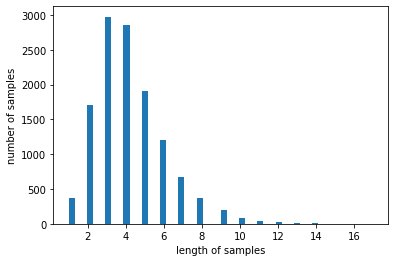

In [0]:
print('문장의 최대 단어 개수 :',max(len(l) for l in X_train))
print('문장의 평균 단어 개수 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [0]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [0]:
max_len = 10
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 10 이하인 샘플의 비율: 99.32432432432432


In [0]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [0]:
print(X_train[:5])


[[   0    0    0    0    0    0    0    0    0 2908]
 [   0    0    0    0    0    0    0   34    7  112]
 [   0    0    0    0    0    0    0 1369   34  313]
 [   0    0    0    0    0    0  430    9  190   89]
 [   0    0    0    0  431 1666 1176   29 1176   47]]


In [0]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train)
print(y_test[:5])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


# LSTM으로 감정분석

In [0]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [0]:
from gensim.models import Word2Vec

word2vec_model = Word2Vec.load("word2vec.model")
print(word2vec_model.wv.vectors.shape) # 모델의 크기 확인

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(49645, 100)


In [0]:
embedding_matrix = np.zeros((vocab_size, 100))
np.shape(embedding_matrix)

(4547, 100)

In [0]:
def get_vector(word):
    if word in word2vec_model:
        return word2vec_model[word]
    else:
        return None

In [0]:
for word, i in tokenizer.word_index.items(): # 훈련 데이터의 단어 집합에서 단어와 정수 인덱스를 1개씩 꺼내온다.
    temp = get_vector(word) # 단어(key) 해당되는 임베딩 벡터의 300개의 값(value)를 임시 변수에 저장
    if temp is not None: # 만약 None이 아니라면 임베딩 벡터의 값을 리턴받은 것이므로
        embedding_matrix[i] = temp # 해당 단어 위치의 행에 벡터의 값을 저장한다.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
print(word2vec_model['남자친구'])

[-0.29622957 -0.01232167  0.02212895  0.04573652  0.19463298  0.0604015
 -0.10179431  0.00407945  0.12867852  0.04435913  0.05678782  0.05897155
 -0.08818566 -0.01258476 -0.02793592 -0.04933745  0.13542652 -0.004594
  0.4631114  -0.01209522 -0.02745974 -0.26975733  0.02127541 -0.02022046
  0.12246309  0.02551092 -0.33498597  0.2088271  -0.21990809 -0.08896777
  0.05659754 -0.11328589  0.10328291 -0.2284612   0.18262912  0.09118719
  0.11411256 -0.26195508 -0.08691055  0.19152367 -0.31014913  0.08784087
  0.22078189  0.01931649 -0.17586322 -0.10265503  0.1316505  -0.3462994
  0.08319812  0.43657723  0.28995022 -0.25293812  0.06277131  0.04516478
  0.037575   -0.02545815  0.09920163 -0.21924137  0.6041844  -0.1866528
  0.04761497 -0.11172818 -0.12513861 -0.07848287  0.38015315  0.0245259
  0.35456446  0.10925893 -0.14752205  0.11988889 -0.31340525  0.41965914
  0.10868533 -0.05491037  0.10653854 -0.13046819 -0.08412962  0.24302603
 -0.1391042  -0.01418778 -0.09309226 -0.24955276 -0.20919

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [0]:
print("단어 '남자친구'의 정수 인덱스 :", tokenizer.word_index['남자친구'])

단어 '남자친구'의 정수 인덱스 : 41


In [0]:
print(embedding_matrix[40])

[-0.55932057 -0.70554042 -1.02004004 -0.61851245 -0.54972577 -2.22558689
  0.52846217 -1.58170331  1.75247657 -1.69655168  2.20815372  2.00707555
 -2.48568344 -1.20153618 -0.139147   -1.21003258 -0.78134251 -1.69895327
  0.9928692  -3.45112801  0.19552326 -1.90850747  0.64220941  0.97900927
 -1.76719868  1.39775097  0.10463355  1.56999266 -0.23509189  0.86290407
 -1.03276432 -0.45497611 -2.34759045 -1.22827685 -0.67156619 -0.48719114
  0.82308143 -2.13610196  0.95782936  1.17390966 -0.89182127 -1.67959011
  0.24374574  0.70227212  0.26690125 -0.46137577 -0.44697618 -1.48401797
 -1.21193397  2.70293617  1.14626968  1.19172585 -2.10418344 -0.1792663
  2.0275383   0.51368058 -0.19657099 -1.08046508  1.68607926  0.067662
  1.96807563 -0.55450469 -0.50626183 -0.59839213 -0.52727032 -1.75428045
 -3.24834323  0.24764489 -0.27391317  1.61698639 -1.10416591  0.39764652
  1.22792816  1.46618509 -2.36313415  0.253692    0.12933411  1.96138978
 -2.30633903 -1.55251217  2.41672421 -2.29388642 -0.69

In [0]:
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=10, weights=[embedding_matrix]))
#model.add(LSTM(128, recurrent_activation='hard_sigmoid'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=70, validation_split=0.2)

Epoch 1/15
141/143 [============================>.] - ETA: 0s - loss: 0.8198 - acc: 0.6410
Epoch 00001: val_acc improved from -inf to 0.38601, saving model to best_model.h5
143/143 [==============================] - 1s 10ms/step - loss: 0.8202 - acc: 0.6407 - val_loss: 1.3209 - val_acc: 0.3860
Epoch 2/15
137/143 [===========================>..] - ETA: 0s - loss: 0.5897 - acc: 0.7651
Epoch 00002: val_acc improved from 0.38601 to 0.41295, saving model to best_model.h5
143/143 [==============================] - 1s 8ms/step - loss: 0.5888 - acc: 0.7648 - val_loss: 1.4224 - val_acc: 0.4129
Epoch 3/15
138/143 [===========================>..] - ETA: 0s - loss: 0.4348 - acc: 0.8326
Epoch 00003: val_acc improved from 0.41295 to 0.43506, saving model to best_model.h5
143/143 [==============================] - 1s 9ms/step - loss: 0.4354 - acc: 0.8319 - val_loss: 1.5190 - val_acc: 0.4351
Epoch 4/15
140/143 [============================>.] - ETA: 0s - loss: 0.3054 - acc: 0.8842
Epoch 00004: val_acc

In [0]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

103/103 [==============================] - 0s 2ms/step - loss: 0.4136 - acc: 0.8747

 테스트 정확도: 0.8747


In [0]:
input = [
         '남자친구랑 헤어졌어', '내 여자친구 너무 이뻐', '여자친구 이제 별로 싫어', '썸남이 고백했어',
         '점심 안 먹었더니 배고프다', '오빠가 반지 선물줬어', '놀이동산 가자', '이거 뭐임',
         '진짜 너무 사랑스러워', '그녀는 너무 사랑스러워', '너무 너무 너무 이뻐', '썸녀가 이쁘네',
         '그녀가 이쁘구만', '다른여자가 더 이뻐', '똥이 잘생겼네', '남자친구가 잘생겼어',
         '불륜남이 잘생겼어', '사랑해'
        ]
input_label = [1, 2, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2]
tokenized_input = []
for sentence in input:
    temp = []
    temp = okt.morphs(sentence, stem=True) # 토큰화
    temp = [word for word in temp if not word in stopwords] # 불용어 제거
    tokenized_input.append(temp)

print(tokenized_input)

encoding_input = tokenizer.texts_to_sequences(tokenized_input)

print(encoding_input)

padding_input = pad_sequences(encoding_input, maxlen=max_len)

print(padding_input)

results = loaded_model.predict(padding_input)

result_label = []
for i, result in enumerate(results):
  print(i,'문장: {0} => {1} => {2}'.format(input[i],result, np.argmax(result)))
  result_label.append(np.argmax(result))

test_label = to_categorical(input_label)
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(padding_input,test_label)[1]))

hit = []
for i, data in enumerate(input_label):
    if data == result_label[i]:
        hit.append(1)
    else:
        hit.append(0)
hit = np.array(hit)
dic = {'input_label':input_label, 'result_label':result_label, 'hit':hit}
df = pd.DataFrame(dic)
print(df)
print(' input_label: ',input_label)
print('result_label: ', result_label)

[['남자친구', '랑', '헤어지다'], ['내', '여자친구', '너무', '이쁘다'], ['여자친구', '이제', '별로', '싫다'], ['썸남', '고백'], ['점심', '안', '먹다', '배고프다'], ['오빠', '반지', '선물', '주다'], ['놀이동산', '가다'], ['거', '뭐임'], ['너무', '사랑스럽다'], ['그녀', '너무', '사랑스럽다'], ['너무', '너무', '너무', '이쁘다'], ['썸녀', '이쁘다'], ['그녀', '이쁘다'], ['다른', '여자', '더', '이쁘다'], ['똥', '잘생기다'], ['남자친구', '잘생기다'], ['불륜', '남', '잘생기다'], ['사랑']]
[[41, 51, 17], [13, 37, 6, 385], [37, 63, 324, 97], [48, 106], [921, 10, 33, 599], [457, 726, 92, 94], [1796, 27], [18, 1363], [6, 1027], [31, 6, 1027], [6, 6, 6, 385], [54, 385], [31, 385], [132, 55, 87, 385], [628], [41, 628], [3761, 376, 628], [11]]
[[   0    0    0    0    0    0    0   41   51   17]
 [   0    0    0    0    0    0   13   37    6  385]
 [   0    0    0    0    0    0   37   63  324   97]
 [   0    0    0    0    0    0    0    0   48  106]
 [   0    0    0    0    0    0  921   10   33  599]
 [   0    0    0    0    0    0  457  726   92   94]
 [   0    0    0    0    0    0    0    0 1796   27]
 [   0    0    

In [0]:
model = Sequential()
model.add(Embedding(vocab_size, 3, input_length=10))

result = model.predict(X_test)
print(X_test[0:5])
print(result.shape)
print(result[:5])

[[   0    0    0    0    0    0    0    0    0 2908]
 [   0    0    0    0    0    0    0   34    7  112]
 [   0    0    0    0    0    0    0 1369   34  313]
 [   0    0    0    0    0    0  430    9  190   89]
 [   0    0    0    0  431 1666 1176   29 1176   47]]
(3289, 10, 3)
[[[-0.03589146 -0.04568441 -0.01148231]
  [-0.03589146 -0.04568441 -0.01148231]
  [-0.03589146 -0.04568441 -0.01148231]
  [-0.03589146 -0.04568441 -0.01148231]
  [-0.03589146 -0.04568441 -0.01148231]
  [-0.03589146 -0.04568441 -0.01148231]
  [-0.03589146 -0.04568441 -0.01148231]
  [-0.03589146 -0.04568441 -0.01148231]
  [-0.03589146 -0.04568441 -0.01148231]
  [ 0.03818507  0.01139401 -0.04047338]]

 [[-0.03589146 -0.04568441 -0.01148231]
  [-0.03589146 -0.04568441 -0.01148231]
  [-0.03589146 -0.04568441 -0.01148231]
  [-0.03589146 -0.04568441 -0.01148231]
  [-0.03589146 -0.04568441 -0.01148231]
  [-0.03589146 -0.04568441 -0.01148231]
  [-0.03589146 -0.04568441 -0.01148231]
  [ 0.03043008 -0.02600144  0.04844284